<a href="https://colab.research.google.com/github/ralsouza/machine_learning_python/blob/master/notebooks%5C02_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining business problem
Let's go create a predictive model that's able to predict whether or not a patient has diabetes. To do this, we'll use historical data from patients.

We'll use the dataset [Diabetes Data Set](http://archive.ics.uci.edu/ml/datasets/diabetes)


This dataset describes the medical records of patients from Pima Indians and each record was marqued whether the patient develop diabetes or not.


**Information about the atributes:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

# 2. Extracting and loading data

In [1]:
# Import libraries
import pandas as pd

In [2]:
# Dataset path
path = '/content/drive/My Drive/Colab Notebooks/07_machine_learning/data/pima-data.csv'

In [3]:
# Load data
data = pd.read_csv(path)
data.head(5)

# This dataset doesn't have header

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Load again and add column names
columns = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pd.read_csv(path,names=columns)

In [ ]:
# Check dataset with column names
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Checking the shape
data.shape

(768, 9)

# 3. Data preprocessing

## 3.1 Exploratory Data Analysis - Descriptive Analysis

In [ ]:
# Predictor variables: preg	,plas	,pres	,skin	,test	,mass	,pedi ,age
# Target variable: class
data.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


If the number of rows in the file is bigger, the algorithm might take much time to process. Whether the number of records is smallest, it's possible that there isn't no records enough to train the model.

If there are many columns, the algorithm might have performance problems because the high dimensionality.

The best solution will be depend case by case. Remember that: train the model in a subset of the whole dataset and then apply the model with new data.

In [ ]:
# Check shape
data.shape

(768, 9)

The data types are very important, it might be possible to convert strings, or columns with integer numbers could represent categorical variables or ordinary values.

In [ ]:
# Data types of each attribute
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:
# Describing data
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3.1.1 Check the balance of target variable
In classification problems it might be necessary to balance the classes. Unbalance classes (that is: greater volume in one the classes) are common and need to be addressed during the pre processing fase. We can see bellow that exists a clear disproportion between the classes 0 (not occurrence of diabetes) and 1 (occurrence of diabetes).

The algorithm might learn more about the the class 0 than the class 1, it's possible to apply some technique to balance these variables.

In [ ]:
# Check the balance of the target variable - Distribuition of classes
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In classification problems it might be necessary to balance the classes. Unbalance classes (that is: greater volume in one the classes) are common and need to be addressed during the pre processing fase. We can see above that exists a clear disproportion between the classes 0 (not occurrence of diabetes) and 1 (occurrence of diabetes).

The algorithm might learn more about the the class 0 than the class 1, it's possible to apply some technique to balance these variables.

### 3.1.2 Check the correlation between variables
The correlation is the relationship between two variables. The most common method to calculate correlation is the **Pearson correlation**, that assumes a normal distribuition of data. A correlation -1 show a negative correlation, while a correlation +1 shows a positive correlation. A correlation iguals 0 means that there is no correlation between variables.

Some algorithms such as linear regression and logistic regression may present performance problems if there are highly correlated attributes (collinearity).

In [8]:
# Pearson correlation method
data.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 3.1.3 Skewness - A measure of the asymmetry
Skewness (of asymmetry) refers to the distribuition of data that is assumed to be normal or gaussian (bell curve). Many algorithms of machine learning assumes that the data is in a normal distribuition. Knowing the symmetry, it allows to do some preparation and deliver what the algorithm expects to receive, increasing the accuracy of the predict model.

In [9]:
# Check the skewness
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

## 3.2. Data Visualization - Matplotlib

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### 3.2.1 Histogram
We can see that the `age`, `order` and `test` have an exponential distribuition and the `mass` and `press` have a normal distribuition.

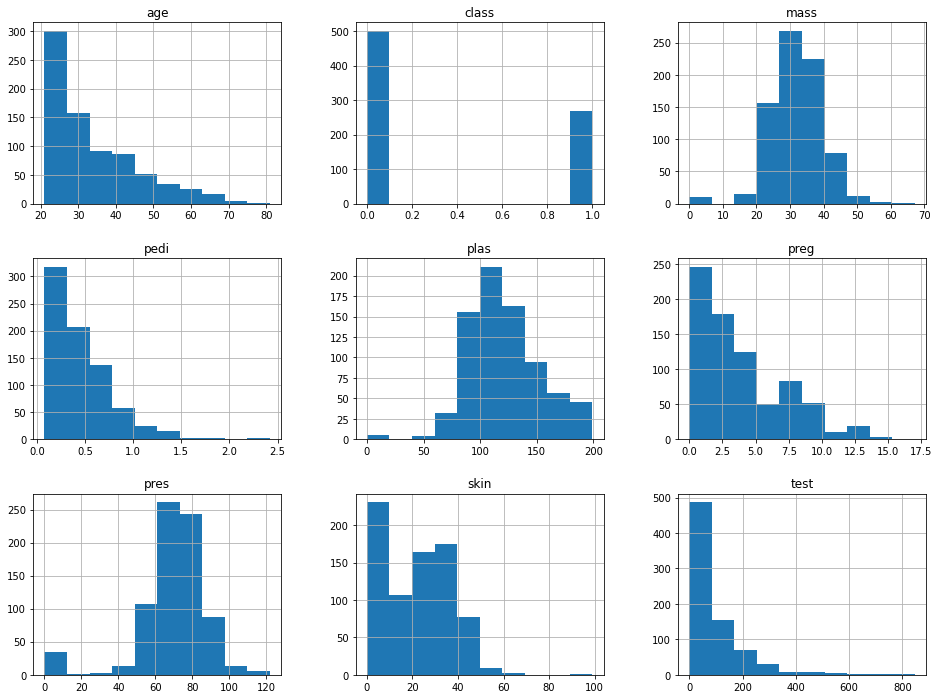

In [17]:
data.hist(figsize=(16,12))
plt.show()

### 3.2.2 Density Plot

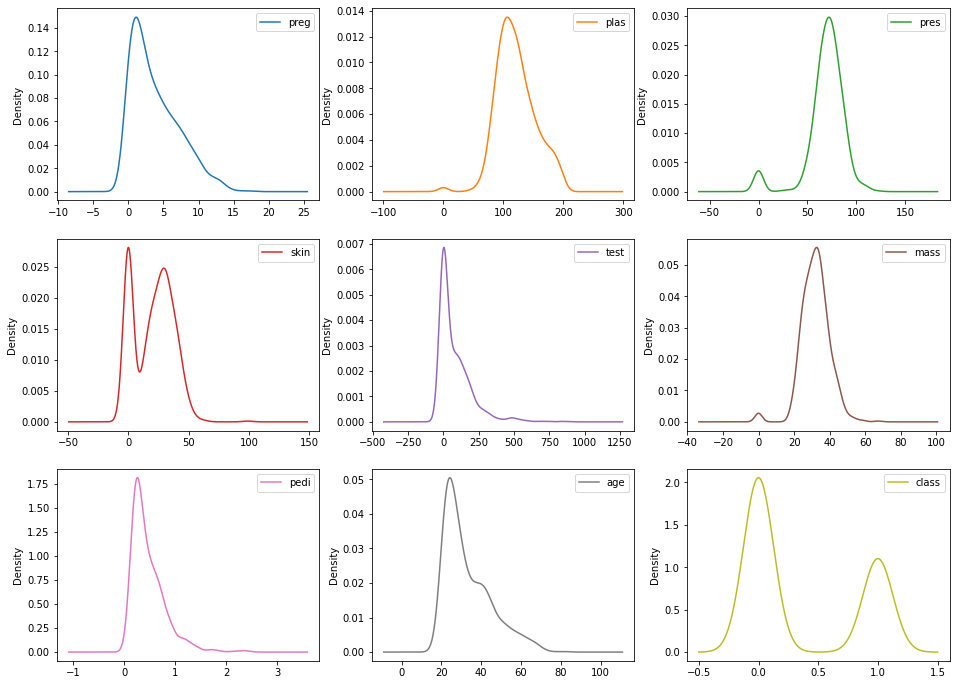

In [22]:
data.plot(kind='density',figsize=(16,12),subplots=True,layout=(3,3),sharex=False)
plt.show()

### 3.2.3 Boxplot
Very useful to identify outliers and data dispersion.
  We can see that the dispersion of the data is quite different among the attributes. The columns `age`, `skin` and `test` have a symmetry closer to the values of the smallest data.


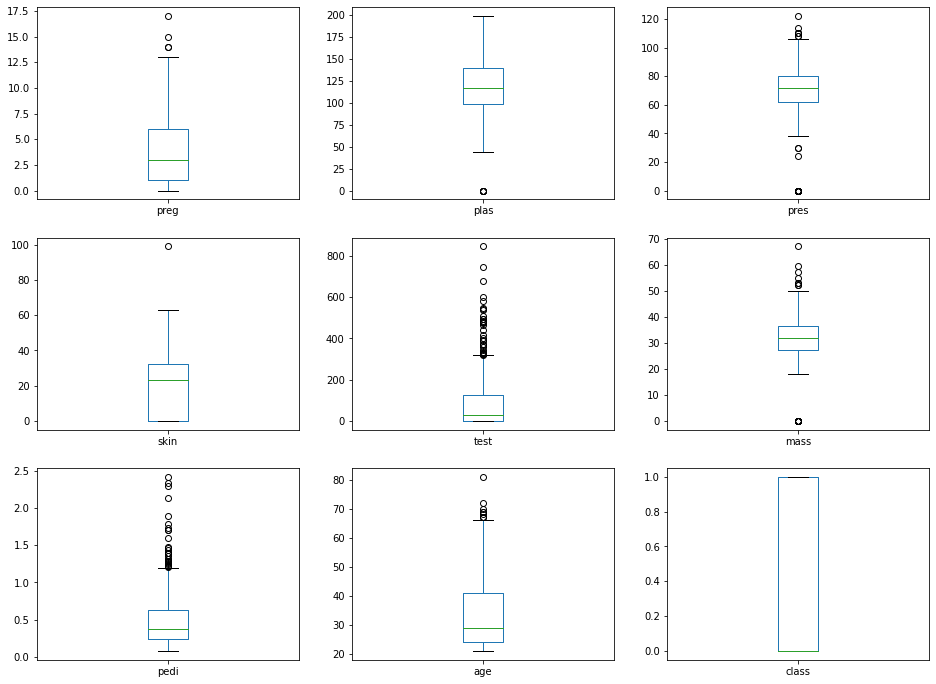

In [24]:
data.plot(kind='box',figsize=(16,12),subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

### 3.2.4 Correlation Matrix

In [27]:
import numpy as np

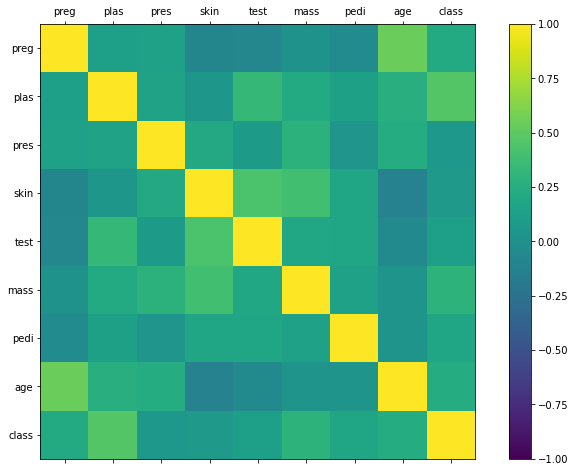

In [29]:
correlations = data.corr()

# Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

### 3.2.5 Scatterplot
A scatterplot shows the relationship between two variables with points in two dimensions, being an axis to each variable.

Is possible to create a scatterplot to each pair of variables in a dataset. The scatterplot matrix is symmetryc.

In [30]:
from pandas.plotting import scatter_matrix

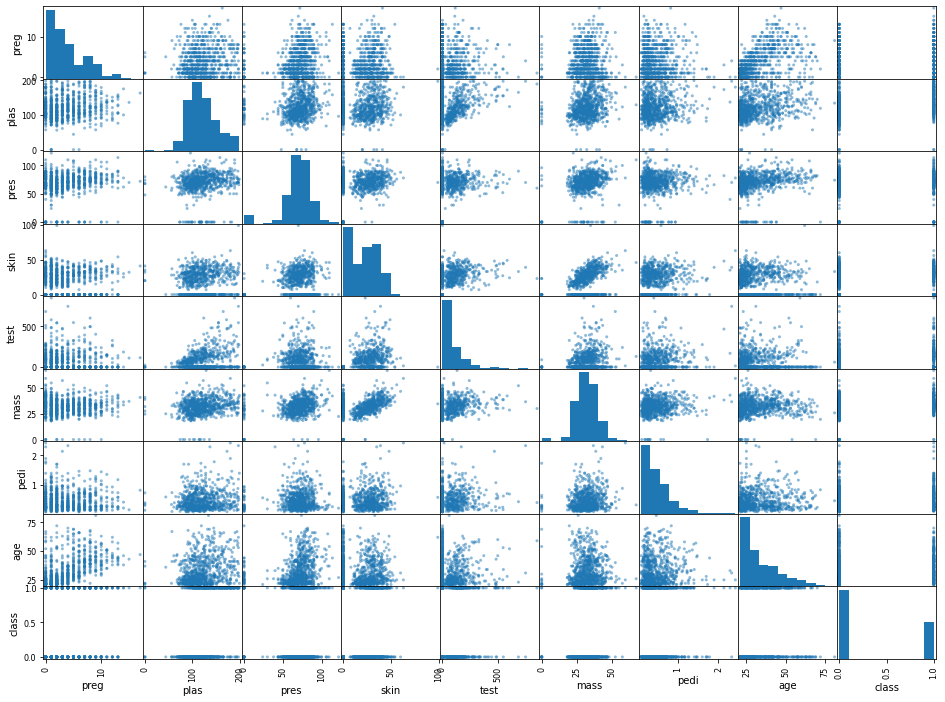

In [32]:
scatter_matrix(data,figsize=(16,12))
plt.show()